# Perceptron monocouche

## Classification à 3 classes (table 3.1)

In [1]:
from perceptron.monocouche import NeuronType, Layer
from utils.data_processing import load_dataframe_from_file
import matplotlib.pyplot as plt
import numpy as np

data = load_dataframe_from_file('../datasets/table_3_1.csv', nbr_labels=3)
exemple1 = Layer(nbr_neurones=3, input_size=2, neurone_type=NeuronType.ADALINE, learning_rate=0.001, epochs=200)
exemple1.train_layer(dataset=data, seuil=0.01, initiate_weights_zero=True)
# for row in  data.itertuples() :
#     pred, round_pred = exemple1.predict(row.inputs)
#     print(f"Prédiction arondie : {round_pred} pour {row.inputs}, expected {row.label}, This affirmation is correct :{round_pred==row.label}")

Nous pouvons afficher le graphique afin de visuellement observer les lignes de décision

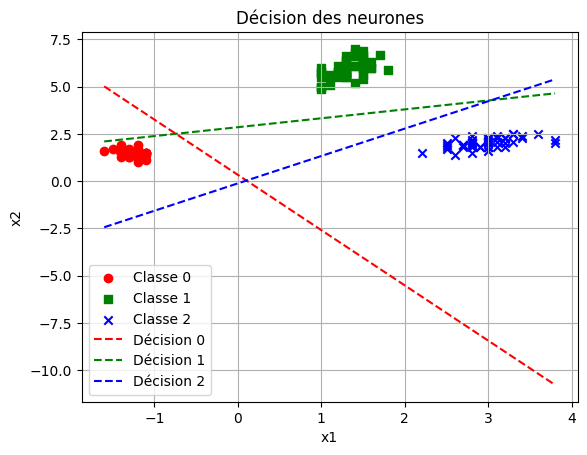

In [3]:
dataset = load_dataframe_from_file('../datasets/table_3_1.csv', nbr_labels=3, add_x0=False)
inputs = np.stack(dataset["inputs"].values)  # shape (n_samples, 2)
labels = np.stack(dataset["label"].values)   # shape (n_samples, 3)

colors = ['red', 'green', 'blue']
markers = ['o', 's', 'x']

# Nuage de points : on affiche les données selon leur classe dominante
dominant_class = np.argmax(labels, axis=1)
for i in range(3):
    class_points = inputs[dominant_class == i]
    plt.scatter(class_points[:, 0], class_points[:, 1],  # x1 = inputs[:,1], x2 = inputs[:,2]
                color=colors[i], marker=markers[i], label=f'Classe {i}')

# Tracer des droites de décision
x_vals = np.linspace(min(inputs[:, 0]), max(inputs[:, 0]), 100)  # x1 sans biais

for idx, neuron in enumerate(exemple1.neurons):
    w = neuron.weights  # [w0, w1, w2] avec biais
    if w[2] != 0:
        y_vals = -(w[0] + w[1] * x_vals) / w[2]
        plt.plot(x_vals, y_vals, color=colors[idx], linestyle='--', label=f'Décision {idx}')
    else:
        x_const = -w[0] / w[1]
        plt.axvline(x=x_const, color=colors[idx], linestyle='--', label=f'Décision {idx} (verticale)')


plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Décision des neurones")
plt.grid(True)
plt.show()

## Classification à 4 classes (table 3.5)

In [5]:
dataset = load_dataframe_from_file('../datasets/table_3_5.csv', nbr_labels=4)
exemple2 = Layer(nbr_neurones=4, input_size=25, neurone_type=NeuronType.ADALINE, learning_rate=0.001, epochs=1000)
exemple2.train_layer(dataset=dataset, seuil=0, initiate_weights_zero=True)
for history in exemple2.get_history() :
    print(history)

epoch                                                     181
mse                                                  0.129087
accuracy                                                  1.0
weights     [0.0011685163967054344, -0.06623699352639788, ...
Name: 180, dtype: object
epoch                                                       2
mse                                                    0.4933
accuracy                                                  1.0
weights     [-0.003974085861495297, -0.001987998949061886,...
Name: 1, dtype: object
epoch                                                       3
mse                                                  0.486515
accuracy                                                  1.0
weights     [-0.005914040018939294, 0.0030027350810947206,...
Name: 2, dtype: object
epoch                                                      62
mse                                                  0.335732
accuracy                                                  1.0